# <p><center>Parking-Lot available parking space detection </center></p>
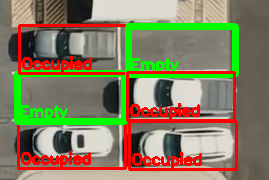
</br>
Yoav Senderovitz : 27/05/2023
<hr>

# <p><center>מטרת המחקר</center></p>
<p style="text-align: center;"> מטרת המחקר היא לעזור לאנשים למצוא מקום חניה בצורה יעילה יותר </p>
<hr>

# <p><center>תיאור הנתונים</center></p>
<p style="text-align: center;">הדאטאסט מורכב משני קבצים הראשון עם תמונות של מקומות חניה פנויים והשני עם תפוסים</p>
<p style="text-align: center;">בקישור לא מתואר מי הכין את הדאטאסט <a href="https://drive.google.com/file/d/11DyZ165lZGzULEZSQNofyy9A8xaYgFJ2/view">Google Drive</a> ניתן למצוא את הדאטאסט</p>
<p style="text-align: center;">ישנם 3045 תמונות של מקומות חניה פנויים וכך גם למקומות החנייה התפוסים</p>
<hr>

# <p><center>חקר הנתונים</center></p>
<p style="text-align: right;">ייבוא הספריות הנחוצות לשני המודלים</p>

In [1]:
import os
import pandas as pd
import pickle
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
import numpy as np

# First model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Second model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


c:\Users\yoavs\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (3.0.4)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
Dir = r'C:\Users\yoavs\Desktop\another one\clf-data'
categories = ['empty', 'not_empty']

In [4]:
dataa = []

In [5]:
for category in categories:
    category_dir = os.path.join(Dir, category)
    for file in os.listdir(category_dir):
        image_path = os.path.join(category_dir, file)
        image_data = {'Category': category, 'Image': image_path}
        dataa.append(image_data)

In [6]:
dataa

[{'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\another one\\clf-data\\empty\\00000000_00000161.jpg'},
 {'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\another one\\clf-data\\empty\\00000000_00000164.jpg'},
 {'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\another one\\clf-data\\empty\\00000000_00000179.jpg'},
 {'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\another one\\clf-data\\empty\\00000000_00000180.jpg'},
 {'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\another one\\clf-data\\empty\\00000000_00000185.jpg'},
 {'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\another one\\clf-data\\empty\\00000000_00000201.jpg'},
 {'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\another one\\clf-data\\empty\\00000000_00000223.jpg'},
 {'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\another one\\clf-data\\empty\\00000000_00000224.jpg'},
 {'Category': 'empty',
  'Image': 'C:\\Users\\yoavs\\Desktop\\an

In [7]:
df = pd.DataFrame(dataa)

In [9]:
df

,Category,Image
0,empty,C:\Users\yoavs\Desktop\another one\clf-data\em...
1,empty,C:\Users\yoavs\Desktop\another one\clf-data\em...
2,empty,C:\Users\yoavs\Desktop\another one\clf-data\em...
3,empty,C:\Users\yoavs\Desktop\another one\clf-data\em...
4,empty,C:\Users\yoavs\Desktop\another one\clf-data\em...
...,...,...
6085,not_empty,C:\Users\yoavs\Desktop\another one\clf-data\no...
6086,not_empty,C:\Users\yoavs\Desktop\another one\clf-data\no...
6087,not_empty,C:\Users\yoavs\Desktop\another one\clf-data\no...
6088,not_empty,C:\Users\yoavs\Desktop\another one\clf-data\no...


In [11]:
print(df.describe())

       Category                                              Image
count      6090                                               6090
unique        2                                               6090
top       empty  C:\Users\yoavs\Desktop\another one\clf-data\em...
freq       3045                                                  1


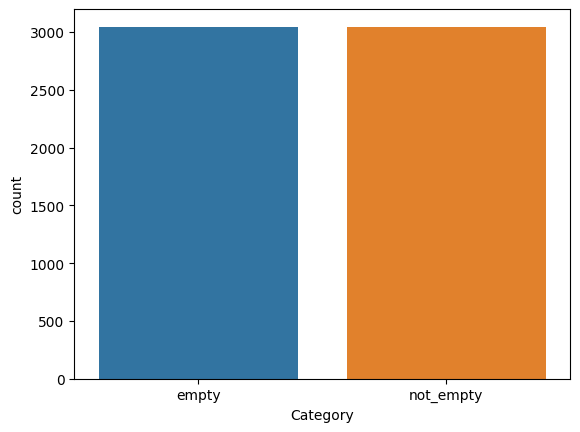

In [10]:
sns.countplot(x='Category', data=df)
plt.show()

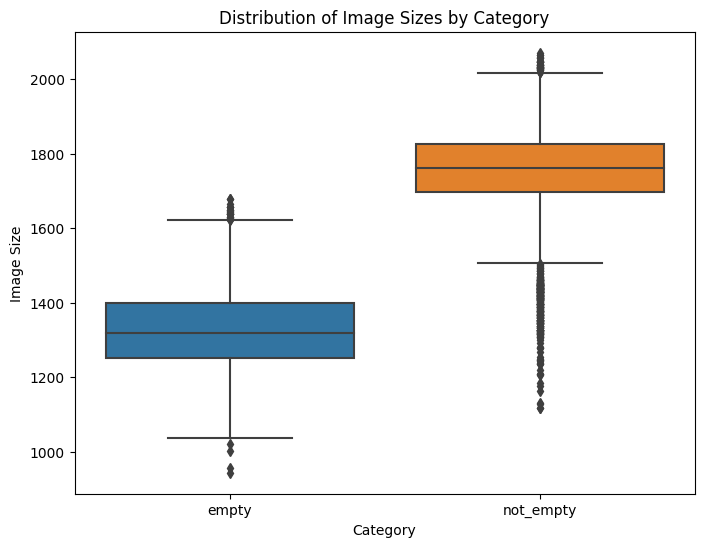

In [14]:
df['Image Size'] = df['Image'].apply(lambda x: os.stat(x).st_size)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Image Size', data=df)
plt.title('Distribution of Image Sizes by Category')
plt.xlabel('Category')
plt.ylabel('Image Size')
plt.show()

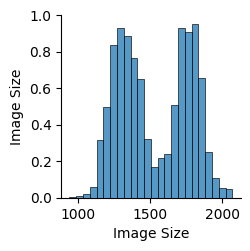

In [16]:
df_numeric = df.drop('Category', axis=1)
sns.pairplot(df_numeric)
plt.show()

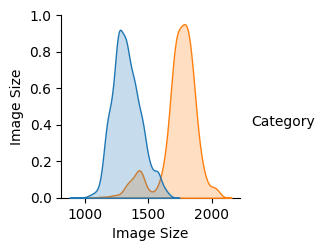

In [20]:
sns.pairplot(df, hue='Category')
plt.show()

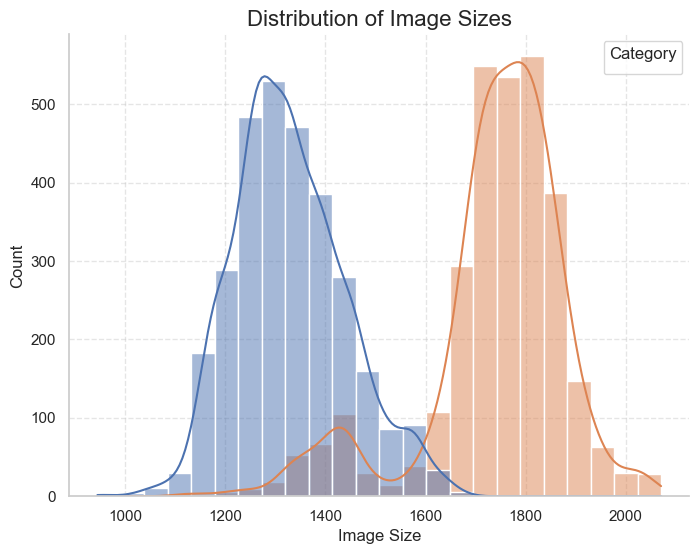

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='Image Size', hue='Category', kde=True)

plt.title('Distribution of Image Sizes', fontsize=16)
plt.xlabel('Image Size', fontsize=12)
plt.ylabel('Count', fontsize=12)

sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Category', fontsize=10, title_fontsize=12)

plt.show()

        Image Size
count  6090.000000
mean   1534.680460
std     242.103727
min     944.000000
25%    1316.000000
50%    1484.500000
75%    1763.000000
max    2071.000000


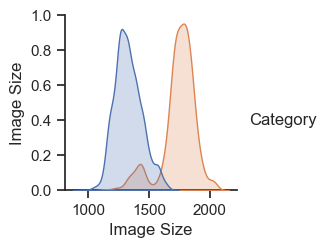

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_stats = df.drop('Category', axis=1).describe()

print(feature_stats)

sns.set(style="ticks")
sns.pairplot(df, hue="Category")
plt.show()




In [3]:
data = [resize(imread(os.path.join(Dir, category, file)), (15, 15)).flatten()
        for category_idx, category in enumerate(categories)
        for file in os.listdir(os.path.join(Dir, category))]

labels = [category_idx
          for category_idx, category in enumerate(categories)
          for file in os.listdir(os.path.join(Dir, category))]

In [4]:
data = np.asarray(data)
labels = np.asarray(labels)

In [7]:
np.save('data.npy', data)


In [8]:
#TODO TO LOAD THE ARRAY: data = np.load('data.npy')

In [32]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [9]:
np.save('labels.npy', labels)

# First Model

# Creating a Test and a Training sets

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.5, shuffle=True, stratify=labels)



In [78]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle=True, stratify=y_train)

# Train Classifier

In [79]:
Classifier = SVC()

In [80]:
HYPER_PARAMETERS = [{'gamma': [0.01, 0.001, 0.0001] , 'C' : [1, 10, 100, 1000]}]
Search = GridSearchCV(Classifier, HYPER_PARAMETERS)

In [81]:
Search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [82]:
Best_Model = Search.best_estimator_
Best_Model

SVC(C=100, gamma=0.01)

In [83]:
y_valid_pred = Best_Model.predict(X_val)

In [90]:
valid_accuracy = accuracy_score(y_val, y_valid_pred)
print("Validation Accuracy: {:.2f}%".format(valid_accuracy * 100))

Validation Accuracy: 99.67%


In [92]:
y_test_pred = Best_Model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 99.87%


# Test the Model

Accuracy: 0.9986863711001642
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1523
           1       1.00      1.00      1.00      1522

    accuracy                           1.00      3045
   macro avg       1.00      1.00      1.00      3045
weighted avg       1.00      1.00      1.00      3045



<AxesSubplot:>

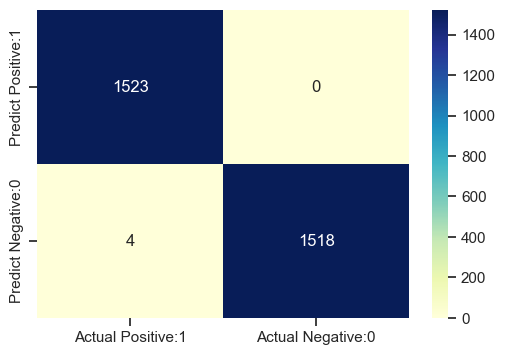

In [95]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [96]:
pickle.dump(Best_Model, open('./model.h5', 'wb'))

# Try the model

In [7]:
import cv2
import pickle

width, height = 107, 48

try:
    with open(r'C:\Users\yoavs\Desktop\another one\model.p', 'rb') as f:
        posList = pickle.load(f)
except:
    posList = []

if isinstance(posList, SVC):
    posList = []

def mouseClick(events, x, y, flags, params):
    if events == cv2.EVENT_LBUTTONDOWN:
        posList.append((x, y))
    if events == cv2.EVENT_RBUTTONDOWN:
        for i, pos in enumerate(posList):
            x1, y1 = pos
            if x1 < x < x1 + width and y1 < y < y1 + height:
                posList.pop(i)

    with open(r'C:\Users\yoavs\Desktop\another one\model.p', 'wb') as f:
        pickle.dump(posList, f)

while True:
    img = cv2.imread(r'C:\Users\yoavs\Desktop\another one\ToTest\carParkImg.png')

    if img is None:
        print("Error: Failed to load image")
        break

    for pos in posList:
        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), (255, 0, 255), 2)

    cv2.imshow("Image", img)
    cv2.setMouseCallback("Image", mouseClick)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [8]:
import cv2
import cvzone

cap = cv2.VideoCapture(r"C:\Users\yoavs\Desktop\another one\ToTest\carPark.mp4")

with open(r'C:\Users\yoavs\Desktop\another one\model.p', 'rb') as f:
    posList = pickle.load(f)

width, height = 107, 48

def checkParkingSpace(imgPro):
    spaceCounter = 0

    for pos in posList:
        x, y = pos
 
        imgCrop = imgPro[y:y + height, x:x + width]
        count = cv2.countNonZero(imgCrop)

        if count < 900:
            status = "Empty"
            color = (0, 255, 0)
            thickness = 2
            spaceCounter += 1
        else:
            status = "Occupied"
            color = (0, 0, 255)
            thickness = 2

        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), color, thickness)
        # cvzone.putTextRect(img, str(count), (x, y + height - 3), scale=1,
                        #    thickness=2, offset=0, colorR=color)
        cv2.putText(img, status, (x + 2, y + height - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    cvzone.putTextRect(img, f'Free: {spaceCounter}/{len(posList)}', (100, 50), scale=3,
                           thickness=5, offset=20, colorR=(0,200,0))
while True:

    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 1)
    imgThreshold = cv2.adaptiveThreshold(imgBlur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 25, 16)
    imgMedian = cv2.medianBlur(imgThreshold, 5)
    kernel = np.ones((3, 3), np.uint8)
    imgDilate = cv2.dilate(imgMedian, kernel, iterations=1)

    checkParkingSpace(imgDilate)
    cv2.imshow("Image", img)
    key = cv2.waitKey(1) & 0xFF
    if key  == ord('q'):
        break
cv2.destroyAllWindows()

# Second Model KNN

In [128]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.5, random_state=42)


In [166]:
results = []
best_accuracy = 0
best_k = 0
best_params = {}

for k in range(5, 51):
    for weights in ['uniform', 'distance']:
        for p in [1, 2]:

            knn = KNeighborsClassifier(n_neighbors=k, weights=weights, p=p)
            knn.fit(X_train, y_train)

            y_pred = knn.predict(X_valid)
            
            accuracy = accuracy_score(y_valid, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k = k
                best_params = {'weights': weights, 'p': p}
            
            result = {'K': k, 'Weights': weights, 'P': p, 'Validation Accuracy': accuracy}
            results.append(result)

df_results = pd.DataFrame(results)

best_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_params['weights'], p=best_params['p'])
best_knn.fit(np.concatenate((X_train, X_valid)), np.concatenate((y_train, y_valid)))

y_pred_test = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Best K:", best_k)
print("Best Hyperparameters:", best_params)
print("Validation Accuracy:", best_accuracy)
print("Test Accuracy:", test_accuracy)

Best K: 7
Best Hyperparameters: {'weights': 'uniform', 'p': 1}
Validation Accuracy: 0.9994526546250684
Test Accuracy: 0.9991789819376026


In [167]:
df_results

,K,Weights,P,Validation Accuracy
0,5,uniform,1,0.998905
1,5,uniform,2,0.998358
2,5,distance,1,0.998905
3,5,distance,2,0.998905
4,6,uniform,1,0.998358
...,...,...,...,...
179,49,distance,2,0.921182
180,50,uniform,1,0.882868
181,50,uniform,2,0.840175
182,50,distance,1,0.951834


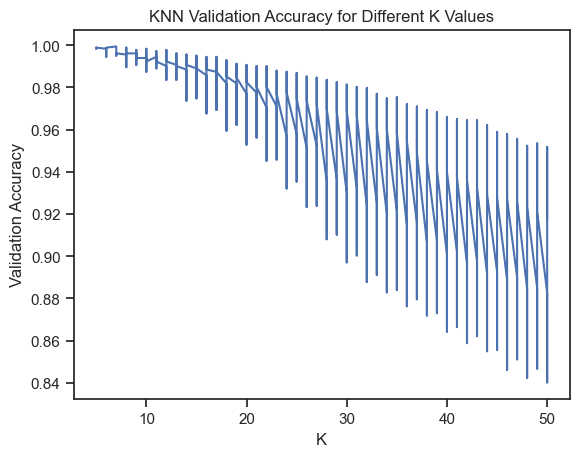

In [168]:
plt.plot(df_results['K'], df_results['Validation Accuracy'])
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.title('KNN Validation Accuracy for Different K Values')
plt.show()

In [170]:
best_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_params['weights'], p=best_params['p'])
best_knn.fit(np.concatenate((X_train, X_valid)), np.concatenate((y_train, y_valid)))

KNeighborsClassifier(n_neighbors=7, p=1)

In [171]:
y_pred_test = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [172]:

print("Validation Accuracy:", best_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9994526546250684
Test Accuracy: 0.9991789819376026


In [107]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Convert weights to numerical values
# weight_mapping = {'uniform': 0, 'distance': 1}
# df_results['param_weights'] = df_results['param_weights'].map(weight_mapping)

# # Extract relevant columns from the results DataFrame
# n_neighbors = df_results['param_n_neighbors']
# weights = df_results['param_weights']
# mean_scores = df_results['mean_test_score']

# # Create a 3D plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the data points
# ax.scatter(n_neighbors, weights, mean_scores, c=mean_scores, cmap='viridis')
# ax.set_xlabel('n_neighbors')
# ax.set_ylabel('weights')
# ax.set_zlabel('mean_test_score')

# # Set axis tick labels
# ax.set_xticks(range(1, 51))
# ax.set_xticklabels(range(1, 51))
# ax.set_yticks([0, 1])
# ax.set_yticklabels(['uniform', 'distance'])

# # Rotate the plot for better visualization
# ax.view_init(elev=30, azim=45)

# # Show the plot
# plt.show()


In [173]:
KNN = None
if os.path.exists("knn.h5"):
    with open("knn.h5", "rb") as f:
        KNN = pickle.load(f)
else:
    KNN = KNeighborsClassifier(n_neighbors=best_k)
    KNN.fit(X_train, y_train)

In [174]:
if not os.path.exists("knn.h5"):
    with open("knn.h5", "wb") as f:
        pickle.dump(KNN, f)

In [175]:
with open(r'C:\Users\yoavs\Desktop\another one\knn.h5', 'rb') as f:
    loaded_model = pickle.load(f)
    
predictions = loaded_model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)


In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

y_pred = best_knn.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9991789819376026
Precision: 1.0
Recall: 0.9983079526226735
F1 Score: 0.9991532599491956


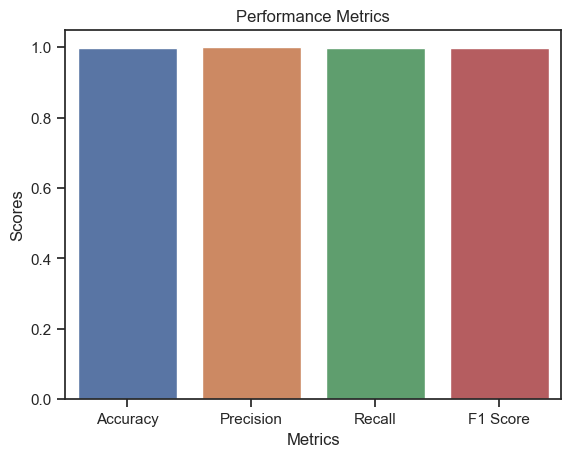

In [177]:
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_scores = [accuracy, precision, recall, f1]

sns.barplot(x=evaluation_metrics, y=metrics_scores)
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()

In [178]:
preds=loaded_model.predict(X_test)

Accuracy: 0.9995894909688013
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      1.00      1.00      1182

    accuracy                           1.00      2436
   macro avg       1.00      1.00      1.00      2436
weighted avg       1.00      1.00      1.00      2436



<AxesSubplot:>

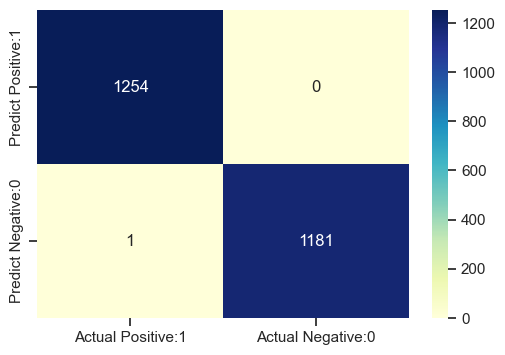

In [182]:
accuracy = accuracy_score(y_test, preds)
report = classification_report(y_test, preds)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [180]:
cm

array([[1254,    0],
       [   1, 1181]], dtype=int64)

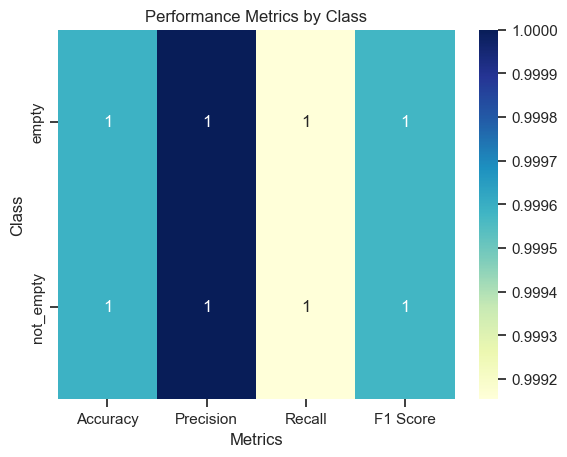

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

class_names = ['empty', 'not_empty']
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1 = 2 * (precision * recall) / (precision + recall)

metrics_scores = [[accuracy, precision, recall, f1]]

df_metrics = pd.DataFrame(metrics_scores, columns=evaluation_metrics, index=class_names)

sns.heatmap(df_metrics, annot=True, cmap='YlGnBu')
plt.title('Performance Metrics by Class')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()
